Section 1: Loading and Exploring the Dataset

Question 1:
Load the Wine Quality dataset from a CSV file into a pandas DataFrame named wine_df

In [11]:
import pandas as pd

# Load the Wine Quality dataset
wine_df = pd.read_csv('winequality-red.csv', delimiter=';')  # Adjust the filename as needed


Question 2:
Display the first 5 rows of the DataFrame using df.head()

In [12]:
# Display the first 5 rows
print(wine_df.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

Question 3:
Check the shape of the DataFrame to find out how many rows and columns it has

In [13]:
# Check the shape of the DataFrame
print(wine_df.shape)


(1599, 12)


Question 4:
Check the data types of each column in wine_df using df.dtypes.

In [14]:
# Check data types of each column
print(wine_df.dtypes)


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


Section 2: Identifying Missing Values

Question 5:
Use df.isnull().sum() to find out how many missing values are in each column

In [15]:
# Find missing values in each column
missing_values = wine_df.isnull().sum()
print(missing_values)


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Section 3: Filling Missing Values

Question 6:
Fill missing values in any column with its median or mode as appropriate.

In [16]:
# Fill missing values in numerical columns with median
for column in wine_df.select_dtypes(include=['float64', 'int64']).columns:
    wine_df[column] = wine_df[column].fillna(wine_df[column].median())


Section 4: Exploring and Visualizing Data

Question 7:
Generate summary statistics for numerical columns using df.describe().

In [17]:
# Generate summary statistics for numerical columns
print(wine_df.describe())


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

Question 8:
Create a histogram for the quality column to visualize its distribution.

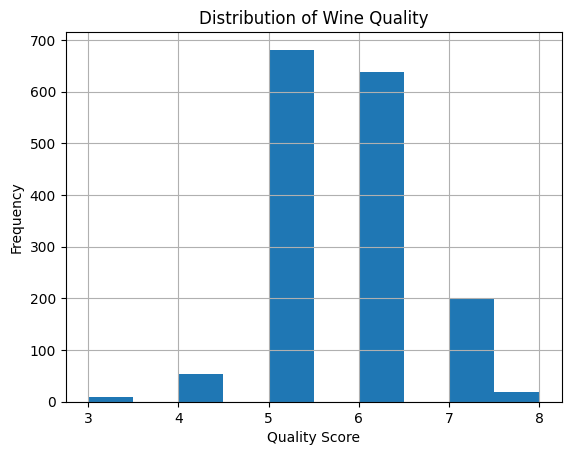

In [18]:
import matplotlib.pyplot as plt

# Histogram for quality distribution
wine_df['quality'].hist(bins=10)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality Score')
plt.ylabel('Frequency')
plt.show()


Section 5: Feature Engineering

Question 9:
Create a new feature called is_high_quality that indicates whether a wine has a quality score greater than or equal to 7.

In [20]:
# Create a new feature for high-quality wines
wine_df['is_high_quality'] = (wine_df['quality'] >= 7).astype(int)


Section 6: Preparing for Linear Regression

Question 10:
Select features for linear regression (e.g., fixed acidity, volatile acidity, citric acid, etc.) and define your target variable (quality).

In [21]:
# Define features and target variable
X = wine_df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
              'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = wine_df['quality']


Section 7: Splitting Data into Training and Testing Sets

Question 11:
Split the dataset into training and testing sets using train_test_split.

In [22]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Section 8: Performing Linear Regression

Question 12:
Import LinearRegression from sklearn and fit the model on the training data.

In [24]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model on training data
model.fit(X_train, y_train)


LinearRegression()

Section 9: Evaluating the Model

Question 13:
Predict quality scores on the test set and calculate R² score, Mean Absolute Error (MAE), and Mean Squared Error (MSE).

In [29]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Predict on test set
y_pred = model.predict(X_test)

# Calculate R² score, MAE, and MSE
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R² Score: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')


R² Score: 0.4031803412796231
Mean Absolute Error: 0.5035304415524376
Mean Squared Error: 0.39002514396395416


Section 10: Visualizing Predictions vs Actual Values

Question 14:
Create a scatter plot to visualize predicted vs actual quality scores

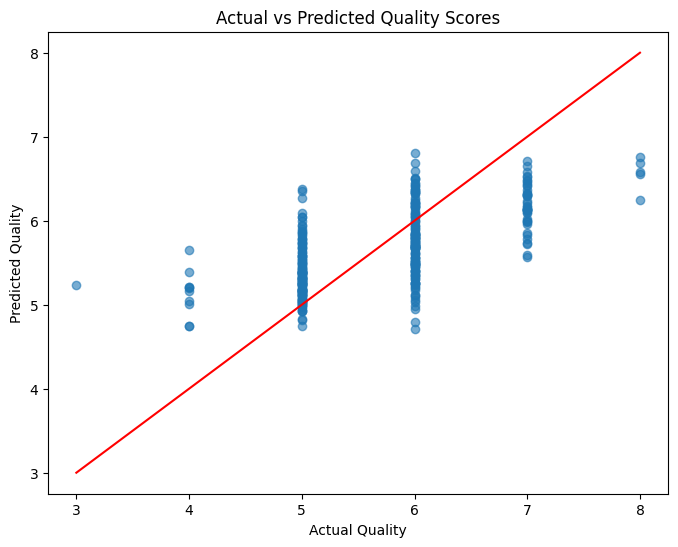

In [28]:
plt.figure(figsize=(8, 6))  # Increase figure size for better readability
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Quality Scores')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Line for perfect prediction
plt.show()
